In [1]:
import numpy as np
import numpy.ma as ma
import time
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib notebook
from shutil import copyfile

In [2]:
myfilename = '/Users/Siwen/Desktop/Ferret/bin/P_asia_year.nc'

rainfile = nc.Dataset(myfilename, 'r')

P_asia = np.swapaxes(rainfile['P_asia_year'][:], 0, 1)
P_asia_sum = np.swapaxes(rainfile['P_asia_year_sum'][:], 0, 1)

p1_yr_b = [1,30]
p1_yr_e = [29,43]
p2_yr_b = [30,44]
p2_yr_e = [57,57]

P_asia_diff = []
P_asia_sum_diff = []

#cycle through all time periods of interest and find changes in each type of rainfall b/w periods
for p1_b, p1_e, p2_b, p2_e, i in zip(p1_yr_b, p1_yr_e, p2_yr_b, p2_yr_e, np.arange(len(p1_yr_b))): 
    
    P_asia_diff.append(np.mean(P_asia[:,:,p2_b-1:p2_e], axis=2) - \
                         np.mean(P_asia[:,:,p1_b-1:p1_e], axis=2))
    
    P_asia_sum_diff.append(np.mean(P_asia_sum[:,:,p2_b-1:p2_e], axis=2) - \
                         np.mean(P_asia_sum[:,:,p1_b-1:p1_e], axis=2))

In [13]:
## LOAD P-VALS
pvalfilename = "/Users/Siwen/Desktop/Ferret/bin/asia_rain_diff_pval_500iter.nc"
pvalfile = nc.Dataset(pvalfilename, 'r')

pval_8007_5179 = pvalfile['pval_8007_5179'][:]
pval_9407_8093 = pvalfile['pval_9407_8093'][:]

pvals = [pval_8007_5179, pval_9407_8093]

pvalfile.close()


In [37]:
qq = abs(pvals[0].T-.5) > .475

In [38]:
plt.pcolormesh(qq)

In [40]:
tst = ma.array(P_asia_diff[0].T, mask = 1-qq)

<IPython.core.display.Javascript object>


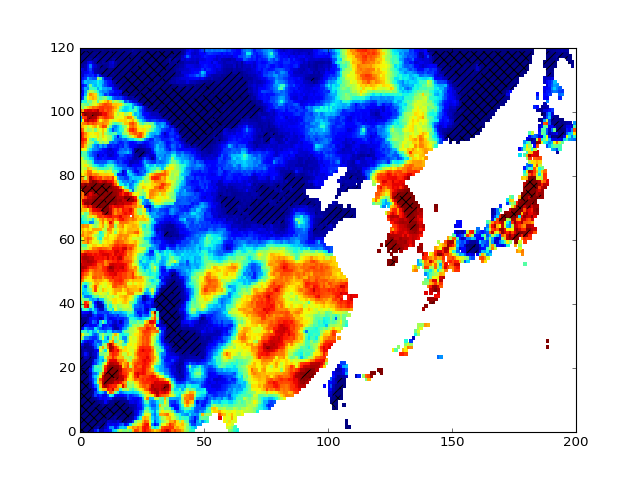

In [132]:
fig1, ax1 = plt.subplots()
vl = pvals[0][140:340,140:260].T
plt1 = plt.pcolormesh(vl)
qqq = abs(vl-.5)
plt2 = plt.contourf(qqq,[0,.475,.495,.5],colors='none',hatches=[' ','///','\\\///'])

plt.savefig('asia_rain_diff_8007_5179.pdf')

<IPython.core.display.Javascript object>


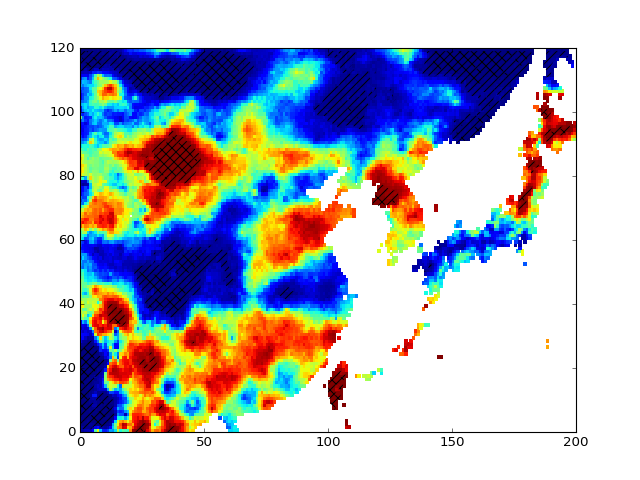

In [133]:
fig1, ax1 = plt.subplots()
vl = pvals[1][140:340,140:260].T
plt1 = plt.pcolormesh(vl)
qqq = abs(vl-.5)
plt2 = plt.pcolo(qqq,[0,.475,.495,.5],colors='none',hatches=[' ','///','\\\///'])

plt.savefig('asia_rain_diff_9407_8093.pdf')